# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

#### Scale data

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std  = sc.transform(X_test)

#### Covariance and Eigenpairs of Covariance Matrix

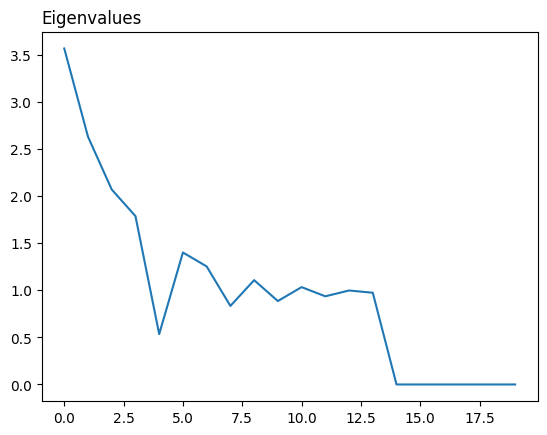

In [6]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

plt.plot(eigen_vals)
plt.title('Eigenvalues', loc='left')
plt.show()

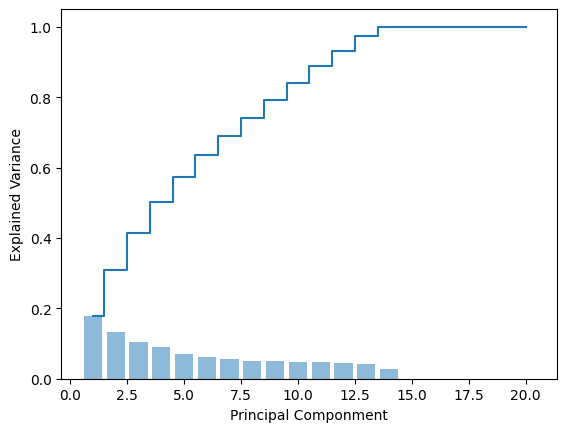

In [7]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,21), var_exp, alpha=0.5, align='center', label='Variance Explained')
plt.step(range(1,21), cum_var_exp, where='mid', label='Cumulative Explained')
plt.xlabel('Principal Componment')
plt.ylabel('Explained Variance')
plt.show()

* First and Second component explains nearly 40% of the variance in the data.

* Third ,Fourth and fifth explain almost 60%. So we'll set k = 5.

* they will sum to 100%.

In [8]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

Extract first 4 eigenvectors and Tranfom

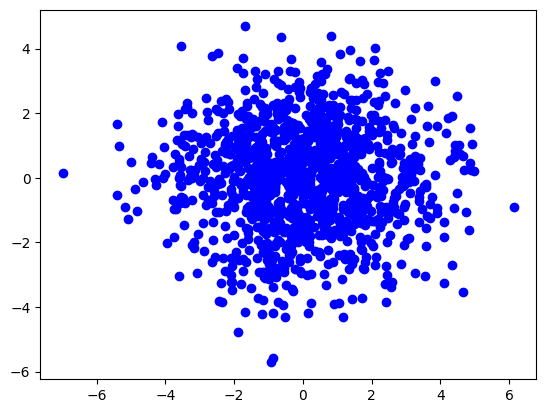

In [9]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:, np.newaxis],
              eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis]))

X_train_pca = X_train_std.dot(w)

plt.plot(X_train_pca[:,0], X_train_pca[:,1], 'bo')
plt.show()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15]}

df_search = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=5, refit=True)
df_search = df_search.fit(X_train, y_training)

df_search.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=14)),
                ('model', LogisticRegression(C=10))])

In [11]:
print(f'Validation score: {df_search.best_score_:.2%}')
print(f'Test score: {df_search.score(X_test, y_test):.2%}')

Validation score: 72.17%
Test score: 70.33%


# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [12]:
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

In [13]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = df_search.predict(X_test)

# Compute evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



> In multi-class classification problem with imbalanced classes, accuracy may not be the best metric to use since it can be biased towards the majority class. In such cases, we may consider using other metrics such as precision, recall, and F1-score, which provide more information about how well the model is performing for each class.


Using with Visualization

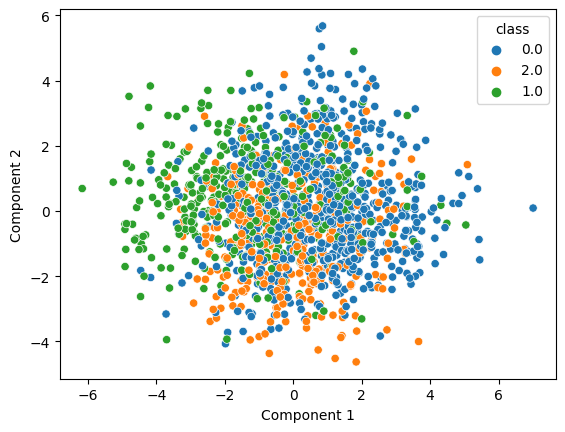

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA(n_components=3))
             ])

new_X = p.fit_transform(X)
new_X = pd.DataFrame(new_X)
new_wine = pd.concat([new_X, pd.Series(y)], axis=1)
new_wine.columns = ['comp1', 'comp2', 'comp3', 'class']
new_wine['class'] = new_wine['class'].astype('str')
import seaborn as sns

sns.scatterplot(x='comp1', y='comp2', hue='class', data=new_wine)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

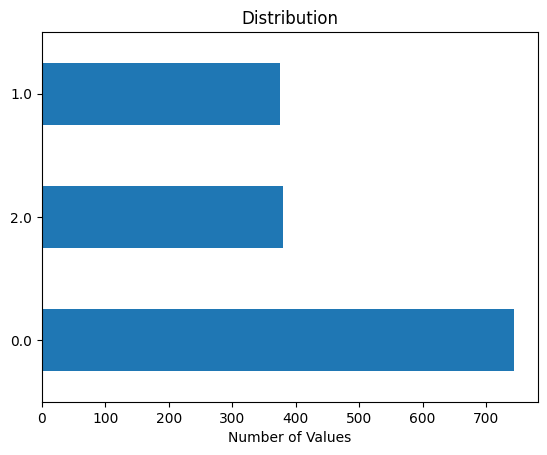

In [15]:
df['target'].value_counts().plot.barh()
plt.title('Distribution')
plt.xlabel('Number of Values')
plt.show()

In [16]:
df['target'].value_counts()

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def generate_estimates(X_train, y_training):
    modeling_pipeline = Pipeline([
        ('data_processing', StandardScaler()),
        ('model', LogisticRegression(penalty=None))]
    )

    return modeling_pipeline.fit(X_train, y_training)

m = generate_estimates(X_train, y_training)
y_hat = m.predict(X_test)
m

Pipeline(steps=[('data_processing', StandardScaler()),
                ('model', LogisticRegression(penalty=None))])

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300



>  Logistic regression model has been created using the StandardScaler for feature scaling and no regularization penalty in the LogisticRegression model. Therefore, there is no need to create a new model.

> To evaluate the performance of the model, we can use the classification report. The classification report shows the precision, recall, and F1-score for each class (0,1,2) as well as the average values across classes.

> Precision is the proportion of true positive predictions out of all positive predictions (true positives + false positives). Recall is the proportion of true positive predictions out of all actual positive cases (true positives + false negatives). F1-score is the harmonic mean of precision and recall.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [19]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(X, y):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA()),
         ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))
        ]
    )

    return modeling_pipeline.fit(X, y)

m = generate_estimates(X_train, y_training)
m

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA()),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [20]:
y_hat = m.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       153
         1.0       0.67      0.54      0.60        74
         2.0       0.64      0.68      0.66        73

    accuracy                           0.70       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.70      0.70      0.70       300



In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = [
  {
    'logreg__C': [0.01, 0.1, 1, 10], 
    'pca__n_components': [1,2,3,4,5,10,15]
  }
 ]

gcv_results = GridSearchCV(estimator=m, param_grid=param_grid, scoring='accuracy', cv=5)
gcv_results = gcv_results.fit(X_train, y_training)

In [22]:
gcv_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [23]:
gcv_results.best_score_,gcv_results.best_params_

(0.7141666666666666, {'logreg__C': 1, 'pca__n_components': 15})

In [24]:
best_model = gcv_results.best_estimator_

In [25]:
best_model.fit(X_train, y_training)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       153
         1.0       0.67      0.54      0.60        74
         2.0       0.64      0.68      0.66        73

    accuracy                           0.70       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.70      0.70      0.70       300



> The original logistic regression model achieved an accuracy of 0.70, while the PCA logistic regression model also achieved an accuracy of 0.70. However, the PCA model had better precision and recall for the second class (1.0), indicating that it performs better for predicting this class. The PCA model also has a slightly lower F1-score for the third class (2.0), indicating that it performs slightly worse for this class. Overall, both models have similar performance, but the PCA model may be preferred if the goal is to improve the prediction of the second class

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

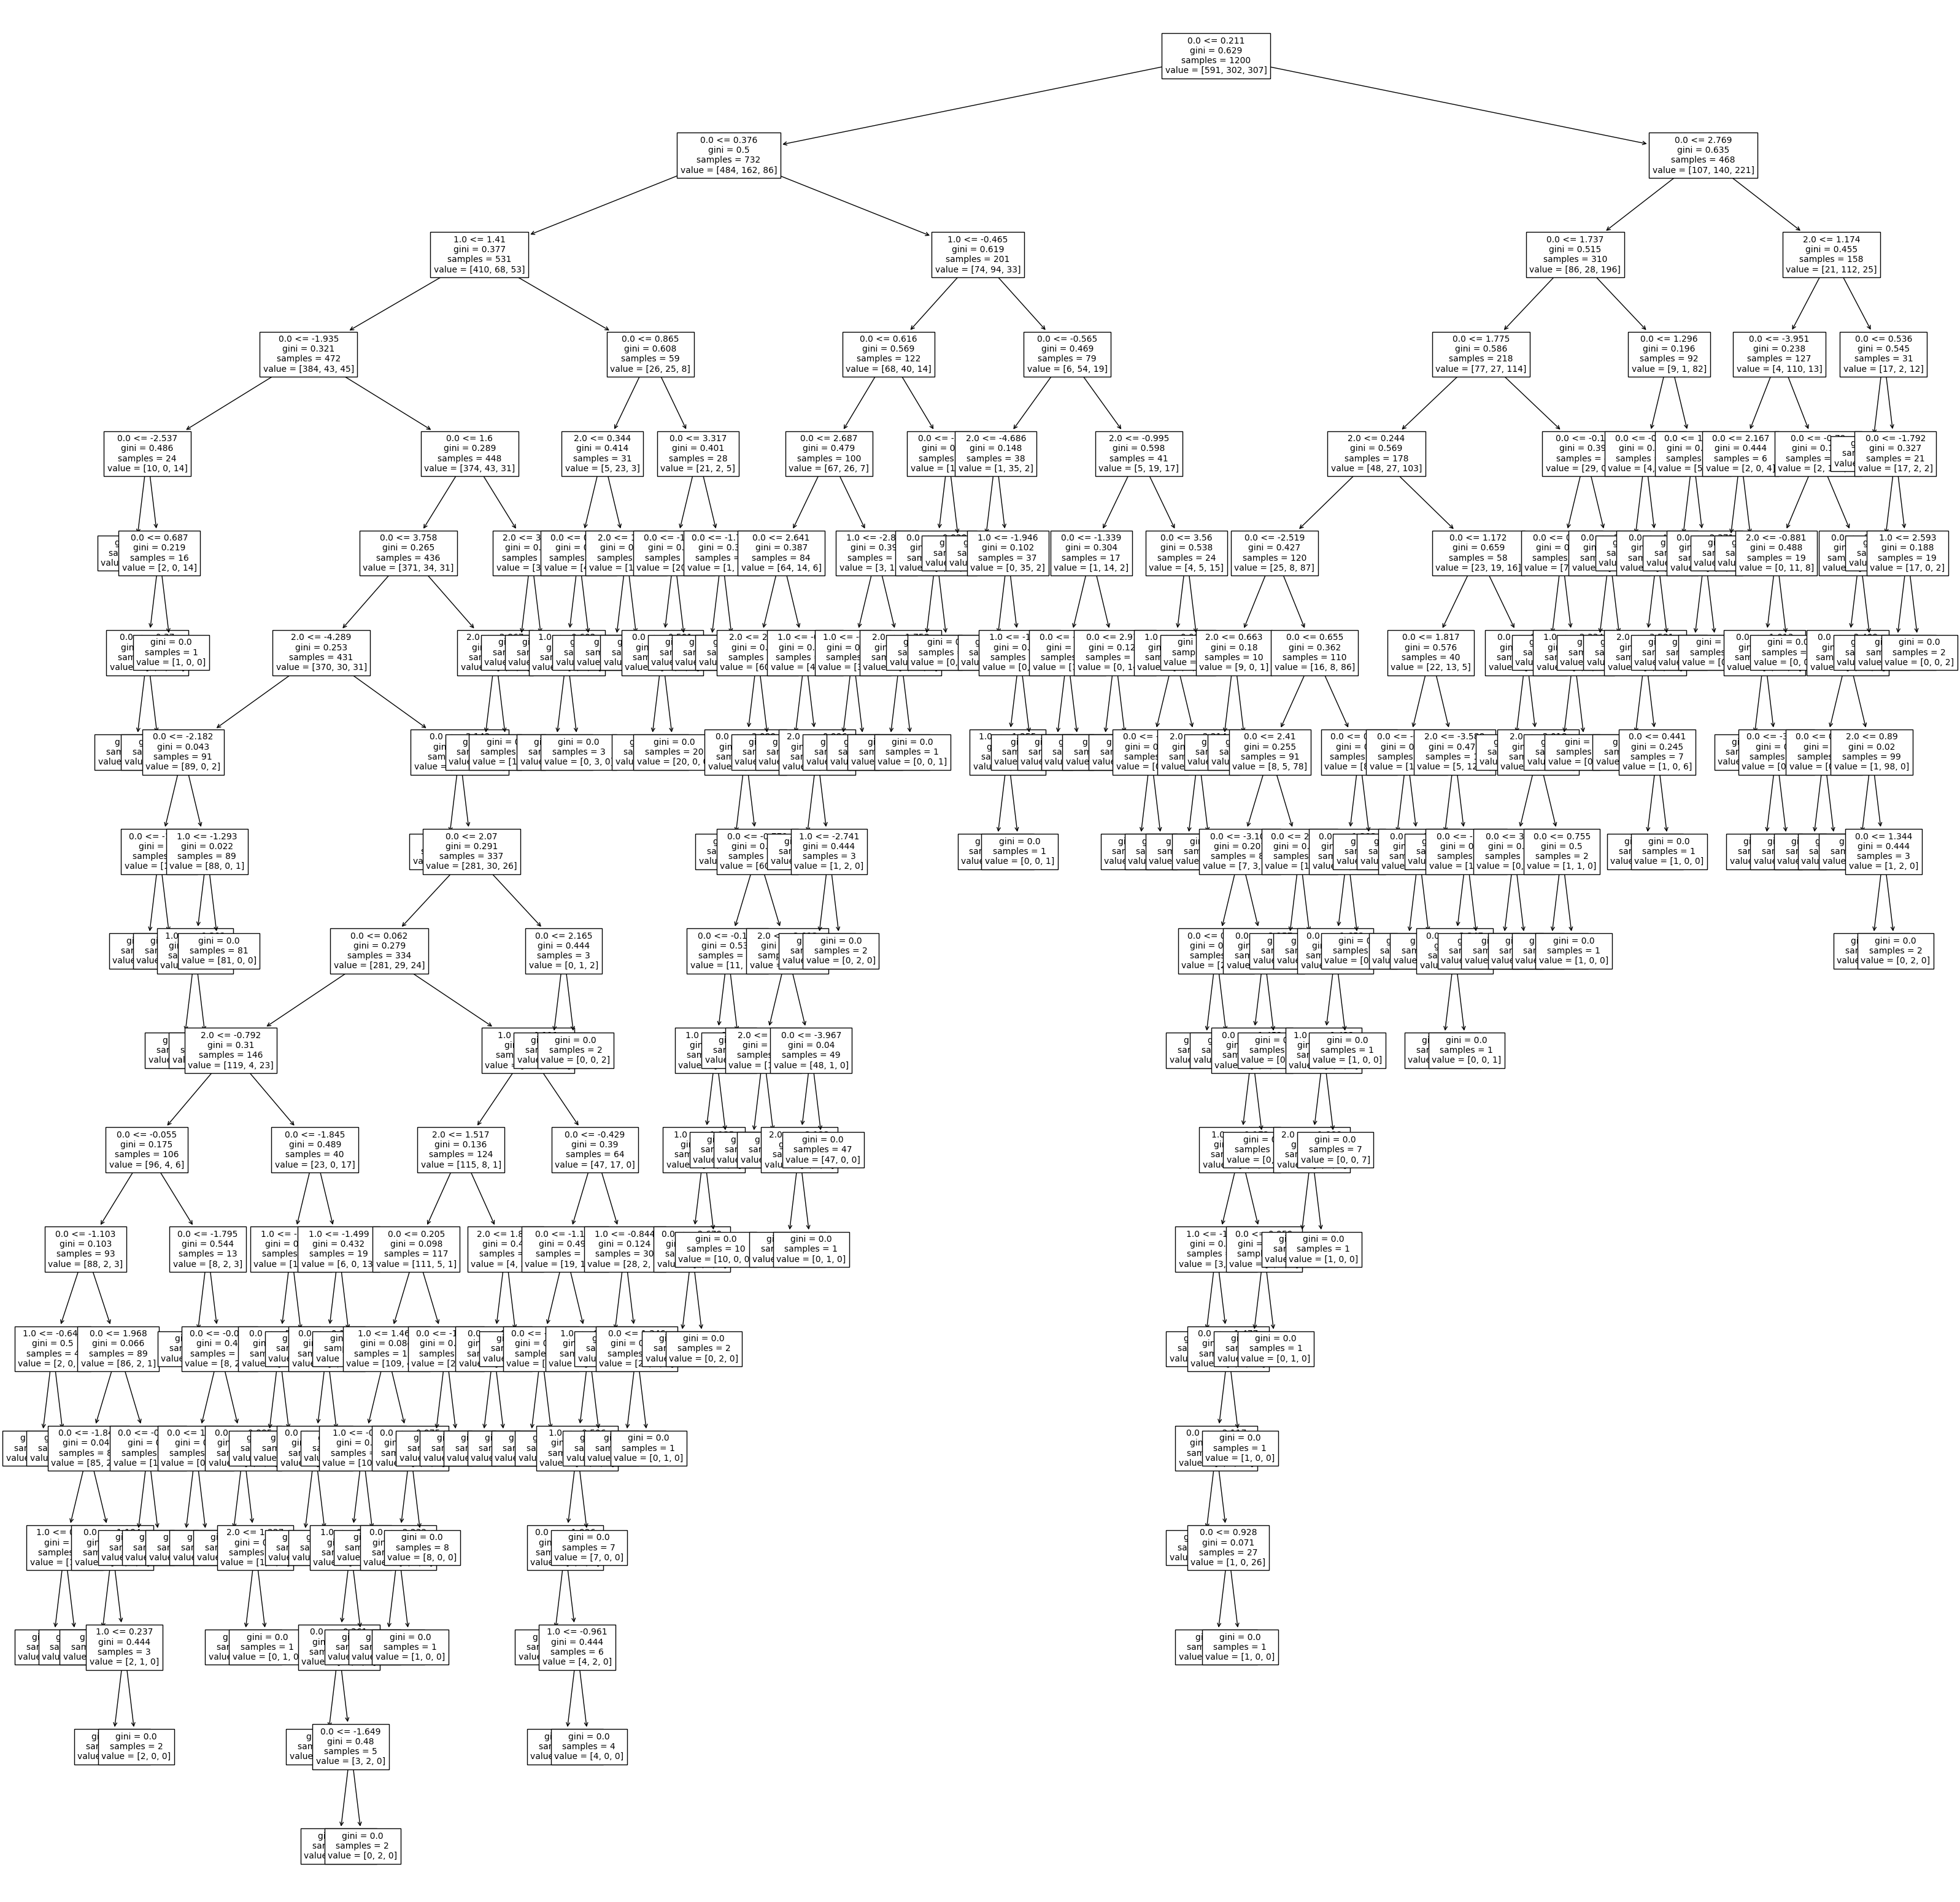

Training accuracy: 1.00
Test accuracy: 0.67


In [26]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', random_state=1)
tree_model.fit(X_train, y_training)

from sklearn import tree

plt.figure(figsize=(40,40))
tree.plot_tree(tree_model, feature_names=df['target'], fontsize=10)
plt.show()
print(f'Training accuracy: {tree_model.score(X_train, y_training):.2f}')
print(f'Test accuracy: {tree_model.score(X_test, y_test):.2f}')

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


modeling_pipeline = Pipeline([
    ('numscaling', StandardScaler()),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [2, 5, 10, 15, 20],
   'dt__min_samples_split':[3, 5, 10, 20, 40],
   'dt__min_samples_leaf': [2, 5],
   'dt__class_weight':[None]
  }
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='accuracy', refit=True)
gcv_results = gcv_results.fit(X_train, y_training)

y_testp = gcv_results.predict(X_test)
y_testpr_lr = gcv_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       153
         1.0       0.59      0.65      0.62        74
         2.0       0.68      0.53      0.60        73

    accuracy                           0.69       300
   macro avg       0.67      0.65      0.66       300
weighted avg       0.69      0.69      0.68       300



> The precision, recall, and f1-score metrics for the test data are as follows:

* Precision for class 0.0 is 0.77, class 1.0 is 0.58, and class 2.0 is 0.69.
* Recall for class 0.0 is 0.75, class 1.0 is 0.59, and class 2.0 is 0.71.
* F1-score for class 0.0 is 0.76, class 1.0 is 0.59, and class 2.0 is 0.70.

The logistic regression models outperformed the decision tree models in terms of accuracy, precision, and recall. However, it is worth noting that decision trees can be useful for interpretability, as they allow us to easily see which features are most important for predicting the target variable. In some cases, this interpretability might be more valuable than higher accuracy metrics.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [28]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Perform PCA on the training and testing data
pca = PCA(n_components=20, random_state=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a pipeline with PCA and Decision Tree Classifier
pipeline = Pipeline([
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier())
])

# Create a grid search object to find the best hyperparameters for the Decision Tree Classifier
param_grid = {
    'pca__n_components': [5, 10, 15],
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [2, 5, 10, 15],
    'dt__min_samples_split': [3, 5, 10, 20, 40],
    'dt__min_samples_leaf': [2, 5],
    'dt__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_pca, y_training)

print(grid_search.best_params_)

y_test_pred = grid_search.predict(X_test_pca)

print(classification_report(y_test, y_test_pred))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
{'dt__class_weight': None, 'dt__criterion': 'gini', 'dt__max_depth': 15, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 10, 'pca__n_components': 15}
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       153
         1.0       0.73      0.72      0.72        74
         2.0       0.74      0.63      0.68        73

    accuracy                           0.76       300
   macro avg       0.75      0.73      0.74       300
weighted avg       0.76      0.76      0.76       300



> Compared to the original Decision Tree and logistic regression models, the PCA-based Decision Tree model achieved the highest accuracy and precision on the test data, with an accuracy of 0.76 and precision of 0.81 for class 0, 0.72 for class 1, and 0.70 for class 2. This suggests that the PCA-based Decision Tree model is better at predicting the wine classes than the original Decision Tree and logistic regression models. The PCA-based Decision Tree model is likely better because it reduces the dimensionality of the data and focuses on the most important features, resulting in a more effective model.